In [ ]:
!pip install solarsystem

In [ ]:
import numpy as np
import pandas as pd
import solarsystem
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_excel(r"/content/Iran1900-2020.xlsx")

In [ ]:
dataset1=pd.read_excel('Iran1900-2020.xlsx',sheet_name=1)
dataset0=pd.read_excel('Iran1900-2020.xlsx',sheet_name=0)

In [ ]:
date=dataset0['Date']
Year=[]
Mon=[]
Day=[]

for i in date:
  Year.append(i[0:4])
  Mon.append(i[5:7])
  Day.append(i[8:10])



In [ ]:
Time=dataset0['Time']
Hour=[]
for i in Time:
  Hour.append(i[0:2])


In [ ]:
Lat=dataset0['Lat.']
Long=dataset0['Long.']
Mag=dataset0['Mag.']

In [ ]:

dataset0=pd.DataFrame({'Year' : Year , 'Month' : Mon , 'Day' : Day ,
        'Hour' : Hour ,'Lat' : Lat , 'Long' : Long , 'Mag': Mag})
print(dataset0)
data_frame=pd.concat([dataset1,dataset0],ignore_index=True, sort=False)
print(data_frame)

       Year Month Day Hour     Lat    Long  Mag
0      2006    01  01   03  33.962  48.661  3.3
1      2006    01  01   07  33.936  48.699  3.4
2      2006    01  01   12  38.033  48.336  2.6
3      2006    01  01   13  38.239  57.172  2.6
4      2006    01  01   13  37.943  48.277  2.7
...     ...   ...  ..  ...     ...     ...  ...
45430  2020    10  12   12  37.983  56.022  2.6
45431  2020    10  12   16  31.784  47.728  2.8
45432  2020    10  12   18  38.843  43.643  2.8
45433  2020    10  13   11  32.158  56.278  2.5
45434  2020    10  13   13  33.929  48.570  3.1

[45435 rows x 7 columns]
       Year Month   Day     Hour     Lat    Long  Mag
0      1900   6.0   NaN      NaN  38.500  43.300  5.0
1      1900   7.0  12.0      NaN  40.280  43.100  5.9
2      1902   2.0  13.0  93906.0  40.720  48.710  6.0
3      1902   2.0  21.0      NaN  41.800  48.800  5.6
4      1902   7.0   9.0    338.0  27.080  56.340  6.4
...     ...   ...   ...      ...     ...     ...  ...
54088  2020    10   

DATASET CORRECTION

In [ ]:
data_frame=data_frame.dropna()
data_frame = data_frame.reset_index()
del data_frame['index']

for y in data_frame.index:
  if (int(data_frame.loc[y, "Month"]) > 12 ):
    data_frame.drop(y, inplace = True)

  if (int(data_frame.loc[y, "Month"]) < 1 ):
    data_frame.drop(y, inplace = True)

  if (int(data_frame.loc[y, "Day"]) > 31 ):
    data_frame.drop(y, inplace = True)
    
  if (int(data_frame.loc[y, "Day"]) < 1 ):
    data_frame.drop(y, inplace = True)  

data_frame = data_frame.reset_index()
del data_frame['index']    


for y in data_frame.index:

  x=str(int(data_frame.loc[y, "Hour"]))  
  if ((len(x)==2) and int(x) < 25 ):
    continue
 
  elif (len(x)==1):
    continue

  elif ( (len(x)==2) and int(x) > 24 ):
   data_frame.loc[y, "Hour"]=x[0] 

  elif (int(x[0:2]) < 25 ):
    data_frame.loc[y, "Hour"]=int(x[0:2])

  elif (int(x[0:2]) > 24 ):
    data_frame.loc[y, "Hour"]=int(x[0])

print(data_frame)

       Year Month   Day Hour  ...    latitM       disM     tetaM  label
0      1902   2.0  13.0    9  ...  1.360985  58.457844  0.058170      1
1      1902   7.0   9.0    3  ... -4.292471  58.557388  0.027918      1
2      1902   9.0   5.0    4  ... -0.919051  60.767641  0.004440      1
3      1902  10.0   3.0   23  ...  0.768923  61.789842  0.003809      1
4      1902  10.0   4.0   14  ...  1.472140  62.153878  0.006834      1
...     ...   ...   ...  ...  ...       ...        ...       ...    ...
54053  2020    10    12   12  ...  4.162257  58.780740  0.030353      0
54054  2020    10    12   16  ...  4.276932  58.618651  0.030659      0
54055  2020    10    12   18  ...  4.331957  58.538170  0.030790      0
54056  2020    10    13   11  ...  4.731207  57.876272  0.031340      0
54057  2020    10    13   13  ...  4.769474  57.801768  0.031339      0

[54058 rows x 59 columns]


In [ ]:
def norm(year,month,day,hour,planet):
  E=solarsystem.geocentric.Geocentric(year=int (year), month=int (month), day=int (day), hour=int (hour), minute=0 ,UT=3.5)
  e=E.position()
  p=e[planet]
  Np=np.sqrt(np.power(p[0],2)+np.power(p[1],2))
  return Np
def angle_sun_p(year,month,day,hour,planet):
  year = int (year)
  month = int (month)
  day = int (day)
  hour = int (hour)
  if planet != 'Moon' :
    E=solarsystem.geocentric.Geocentric(year=year, month=month, day=day, hour=hour, minute=0 ,UT=3.5)
    e=E.position()   
    sun=e['Sun']  
    p=e[planet]
    return Teta(sun,p)          

  else:                        
    M=solarsystem.moon.Moon(year=year, month=month, day=day, hour=hour, minute=0,UT=3.5 )
    m=M.position()
    E=solarsystem.geocentric.Geocentric(year=year, month=month, day=day, hour=hour, minute=0,UT=3.5 )
    e=E.position()
    sun=e['Sun']
    return Teta(sun,m)  


def Teta(sun,planet):
  sun=np.array(sun[0:2])
  p=np.array(planet[0:2])
  Np=np.sqrt(np.power(p[0],2)+np.power(p[1],2))
  Ns=np.sqrt(np.power(sun[0],2)+np.power(sun[1],2))
  x=(p.dot(sun))/(Np*Ns)
  teta=np.arccos(x)
  return teta

A = solarsystem.geocentric.Geocentric(year=2020, month=1, day=1, hour=12, minute=0 ,UT=3.5)
planet_names = A.objectnames()


def LONG_LAT(df,planet_names):
  for i in planet_names:
    if i != 'Sun' :
      t = []
      for x in df.index:
        t.append(angle_sun_p(df.loc[x, "Year"],df.loc[x, "Month"],df.loc[x, 'Day'],df.loc[x, "Hour"],i))

      df['teta'+i]=t
  for planet in planet_names:
    longit = []
    latit = []
    dis = []
    for x in df.index:
      E = solarsystem.geocentric.Geocentric(year=int(df.loc[x, "Year"]), month=int(df.loc[x, "Month"]), day=int(df.loc[x, 'Day']), hour=int(df.loc[x, "Hour"]), minute=0, UT=3.5,dst=1 )
      e = E.position()
      p = e[planet]
      longit.append(p[0])
      latit.append(p[1])
      dis.append(p[2])
    

    df['longit'+ planet] = longit
    df['lait'+ planet] = longit
    df['dic'+ planet] = dis


LONG_LAT(data_frame,planet_names)

def MOON(df):
  longit_m=[]
  latit_m=[]
  dis_m=[]
  for x in df.index:
    M=solarsystem.moon.Moon(year=int(df.loc[x, "Year"]), month=int(df.loc[x, "Month"]), day=int(df.loc[x, 'Day']), hour=int(df.loc[x, "Hour"]), minute=0 ,UT=3.5,dst=1 )
    m=M.position()
    longit_m.append(m[0])
    latit_m.append(m[1])
    dis_m.append(m[2])


  df['longitM']=longit_m
  df['latitM']=latit_m
  df['disM']=dis_m

  t=[]
  for x in df.index:
    t.append(angle_sun_p(df.loc[x, "Year"],df.loc[x, "Month"],df.loc[x, 'Day'],df.loc[x, "Hour"],'Moon'))
  df['tetaM']=t
MOON(data_frame)
print ("dataset and feature\n\n")
print(data_frame)




dataset and feature


       Year Month   Day Hour  ...    latitM       disM     tetaM  label
0      1902   2.0  13.0    9  ...  1.360985  58.457844  0.058170      1
1      1902   7.0   9.0    3  ... -4.292471  58.557388  0.027918      1
2      1902   9.0   5.0    4  ... -0.919051  60.767641  0.004440      1
3      1902  10.0   3.0   23  ...  0.768923  61.789842  0.003809      1
4      1902  10.0   4.0   14  ...  1.472140  62.153878  0.006834      1
...     ...   ...   ...  ...  ...       ...        ...       ...    ...
54053  2020    10    12   12  ...  4.162257  58.780740  0.030353      0
54054  2020    10    12   16  ...  4.276932  58.618651  0.030659      0
54055  2020    10    12   18  ...  4.331957  58.538170  0.030790      0
54056  2020    10    13   11  ...  4.731207  57.876272  0.031340      0
54057  2020    10    13   13  ...  4.769474  57.801768  0.031339      0

[54058 rows x 59 columns]


In [ ]:
print(data_frame.describe())

                Lat          Long  ...         tetaM         label
count  54058.000000  54058.000000  ...  54058.000000  54058.000000
mean      32.920185     52.146044  ...      0.053257      0.082042
std        3.833277      4.813332  ...      0.144473      0.274430
min       22.095000     41.243000  ...      0.000001      0.000000
25%       29.665000     47.930000  ...      0.010502      0.000000
50%       32.658000     51.870000  ...      0.018560      0.000000
75%       36.088000     56.490000  ...      0.036455      0.000000
max       44.090000     66.230000  ...      3.007796      1.000000

[8 rows x 55 columns]


In [ ]:
def Label(Data_Frame):
  label=[]
  for x in Data_Frame.index:
    if Data_Frame.loc[x, "Mag"] >=4.5:
      label.append(1)
    else:
      label.append(0)

  Data_Frame['label']=label

Label(data_frame)
print(data_frame.head(10))

print('\n\n labels: ',data_frame['label'].unique())

   Year Month   Day Hour  ...    latitM       disM     tetaM  label
0  1902   2.0  13.0    9  ...  1.360985  58.457844  0.058170      1
1  1902   7.0   9.0    3  ... -4.292471  58.557388  0.027918      1
2  1902   9.0   5.0    4  ... -0.919051  60.767641  0.004440      1
3  1902  10.0   3.0   23  ...  0.768923  61.789842  0.003809      1
4  1902  10.0   4.0   14  ...  1.472140  62.153878  0.006834      1
5  1902  10.0  17.0    7  ...  0.439973  58.185802  0.018017      1
6  1902  10.0  26.0   11  ... -4.251165  59.491596  0.027752      1
7  1902  12.0   2.0    4  ...  4.676212  63.639740  0.017389      1
8  1902  12.0   4.0   22  ...  5.083206  63.396530  0.016775      1
9  1903   1.0   2.0    7  ...  4.573130  63.139354  0.014410      1

[10 rows x 59 columns]


 labels:  [1 0]


In [ ]:
featur_name=[]
for col in data_frame.columns:
  if col=='Year' or col=='Month' or col=='Day' or col=='Hour' or col=='label' or col=='Mag':
    
    pass
  else: 
    
    featur_name.append(col)

Normallization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#featur_name.append('label')            
dfn=scaler.fit_transform(data_frame[featur_name])

dfN=pd.DataFrame()
i=0
for col in featur_name:
  l=dfn[:,i]
  dfN[col]=l
  i+=1

l=data_frame['label']
dfN['label']=l            ########***************************
print(dfN.shape)
print(dfN)

(54058, 54)
            Lat      Long  tetaMercury  ...      disM     tetaM  label
0      0.846783  0.298835     0.005784  ...  0.326557  0.019339      1
1      0.226642  0.604194     0.029402  ...  0.339357  0.009281      1
2      0.791316  0.270421     0.000499  ...  0.623563  0.001476      1
3      0.900432  0.174371     0.010426  ...  0.755003  0.001266      1
4      0.900432  0.174371     0.010479  ...  0.801812  0.002272      1
...         ...       ...          ...  ...       ...       ...    ...
54053  0.722346  0.591468     0.009811  ...  0.368077  0.010091      0
54054  0.440509  0.259535     0.009800  ...  0.347235  0.010193      0
54055  0.761446  0.096050     0.009794  ...  0.336886  0.010236      0
54056  0.457513  0.601713     0.009731  ...  0.251776  0.010419      0
54057  0.538031  0.293232     0.009722  ...  0.242196  0.010419      0

[54058 rows x 54 columns]


In [ ]:
print(dfN.describe())

                Lat          Long  ...         tetaM         label
count  54058.000000  54058.000000  ...  54058.000000  54058.000000
mean       0.492166      0.436349  ...      0.017706      0.082042
std        0.174279      0.192633  ...      0.048033      0.274430
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.344169      0.267619  ...      0.003491      0.000000
50%        0.480246      0.425301  ...      0.006170      0.000000
75%        0.636190      0.610197  ...      0.012120      0.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 54 columns]


In [ ]:
print(featur_name)

print(len(featur_name))
X = dfN.loc[:, featur_name].to_numpy()
print(X.shape)

y = dfN.loc[:, ['label']].to_numpy()

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020)
print(X_train.shape)

['Lat', 'Long', 'tetaMercury', 'tetaVenus', 'tetaMars', 'tetaJupiter', 'tetaSaturn', 'tetaUranus', 'tetaNeptune', 'tetaPluto', 'tetaCeres', 'tetaChiron', 'tetaEris', 'longitSun', 'laitSun', 'dicSun', 'longitMercury', 'laitMercury', 'dicMercury', 'longitVenus', 'laitVenus', 'dicVenus', 'longitMars', 'laitMars', 'dicMars', 'longitJupiter', 'laitJupiter', 'dicJupiter', 'longitSaturn', 'laitSaturn', 'dicSaturn', 'longitUranus', 'laitUranus', 'dicUranus', 'longitNeptune', 'laitNeptune', 'dicNeptune', 'longitPluto', 'laitPluto', 'dicPluto', 'longitCeres', 'laitCeres', 'dicCeres', 'longitChiron', 'laitChiron', 'dicChiron', 'longitEris', 'laitEris', 'dicEris', 'longitM', 'latitM', 'disM', 'tetaM']
53
(54058, 53)
(43246, 53)


Logistic Regression

In [ ]:
logReg_clf = LogisticRegression(max_iter=100000)
logReg_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=100000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, SCORERS
y_test=y_test.squeeze()
predictions = logReg_clf.predict(X_test)
score = accuracy_score(y_test, predictions)
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
print(classification_report(y_test, predictions))

   

Predicted     0    1
Actual              
0          9644  241
1           478  449
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9885
           1       0.65      0.48      0.56       927

    accuracy                           0.93     10812
   macro avg       0.80      0.73      0.76     10812
weighted avg       0.93      0.93      0.93     10812



Feature: 0, Score: -0.17766
Feature: 1, Score: 0.06545
Feature: 2, Score: -0.00356
Feature: 3, Score: 0.01613
Feature: 4, Score: -0.03426
Feature: 5, Score: 0.01378
Feature: 6, Score: -0.13074
Feature: 7, Score: -0.24797
Feature: 8, Score: -1.09175
Feature: 9, Score: 2.29173
Feature: 10, Score: -0.03574
Feature: 11, Score: 0.29833
Feature: 12, Score: 2.17592
Feature: 13, Score: -0.00191
Feature: 14, Score: -0.00191
Feature: 15, Score: 0.00094
Feature: 16, Score: -0.05109
Feature: 17, Score: -0.05109
Feature: 18, Score: 0.00794
Feature: 19, Score: -0.00934
Feature: 20, Score: -0.00934
Feature: 21, Score: 0.01034
Feature: 22, Score: -0.01654
Feature: 23, Score: -0.01654
Feature: 24, Score: 0.00241
Feature: 25, Score: -0.05798
Feature: 26, Score: -0.05798
Feature: 27, Score: 0.04626
Feature: 28, Score: 0.07477
Feature: 29, Score: 0.07477
Feature: 30, Score: -0.07680
Feature: 31, Score: -0.34496
Feature: 32, Score: -0.34496
Feature: 33, Score: 0.09582
Feature: 34, Score: 1.80030
Feature: 3

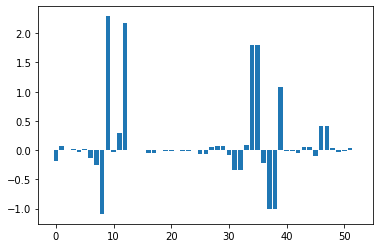

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

importance = logReg_clf.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

[-1.77661966e-01  6.54457066e-02 -3.55656780e-03  1.61264603e-02
 -3.42624064e-02  1.37778340e-02 -1.30743119e-01 -2.47968916e-01
 -1.09175275e+00  2.29173037e+00 -3.57357604e-02  2.98334973e-01
  2.17592247e+00 -1.91331793e-03 -1.91331793e-03  9.42290866e-04
 -5.10944040e-02 -5.10944040e-02  7.94166923e-03 -9.34345147e-03
 -9.34345147e-03  1.03350657e-02 -1.65357957e-02 -1.65357957e-02
  2.41085373e-03 -5.79771213e-02 -5.79771213e-02  4.62569051e-02
  7.47687040e-02  7.47687040e-02 -7.67964098e-02 -3.44962178e-01
 -3.44962178e-01  9.58161572e-02  1.80029916e+00  1.80029916e+00
 -2.13618282e-01 -1.00531794e+00 -1.00531794e+00  1.08873933e+00
 -1.28888201e-02 -1.28888201e-02 -5.27454463e-02  4.71015719e-02
  4.71015719e-02 -9.89869104e-02  4.11376158e-01  4.11376158e-01
  4.01175379e-02 -2.69487102e-02 -1.84874817e-02  2.94541356e-02
 -2.16445033e-03]


Text(0.5, 0, 'Permutation Importance')

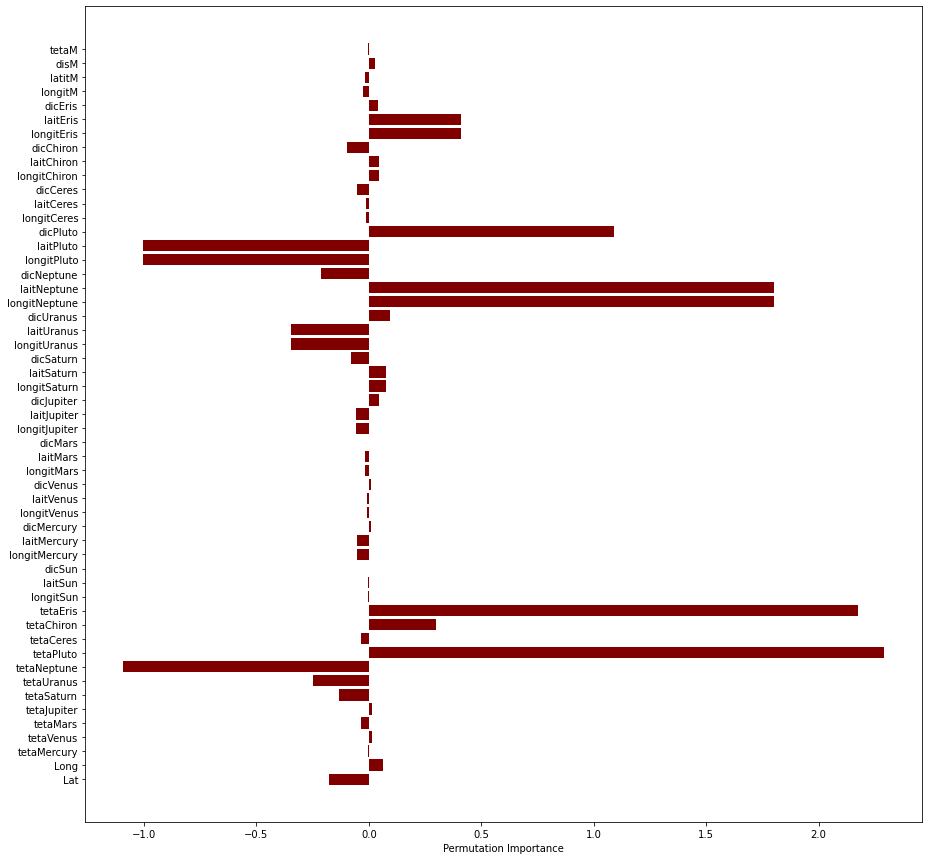

In [ ]:
from sklearn.inspection import permutation_importance


Z = [featur_name for _,featur_name in sorted(zip(importance,featur_name))]
print(importance)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.yticks(range(len(featur_name)), featur_name)
plt.barh(sorted(featur_name), importance, color="maroon")
plt.xlabel("Permutation Importance")

['tetaNeptune', 'laitPluto', 'longitPluto', 'laitUranus', 'longitUranus', 'tetaUranus', 'dicNeptune', 'Lat', 'tetaSaturn', 'dicChiron', 'dicSaturn', 'laitJupiter', 'longitJupiter', 'dicCeres', 'laitMercury', 'longitMercury', 'tetaCeres', 'tetaMars', 'longitM', 'latitM', 'laitMars', 'longitMars', 'laitCeres', 'longitCeres', 'laitVenus', 'longitVenus', 'tetaMercury', 'tetaM', 'laitSun', 'longitSun', 'dicSun', 'dicMars', 'dicMercury', 'dicVenus', 'tetaJupiter', 'tetaVenus', 'disM', 'dicEris', 'dicJupiter', 'laitChiron', 'longitChiron', 'Long', 'laitSaturn', 'longitSaturn', 'dicUranus', 'tetaChiron', 'laitEris', 'longitEris', 'dicPluto', 'laitNeptune', 'longitNeptune', 'tetaEris', 'tetaPluto']


Text(0.5, 0, 'Permutation Importance')

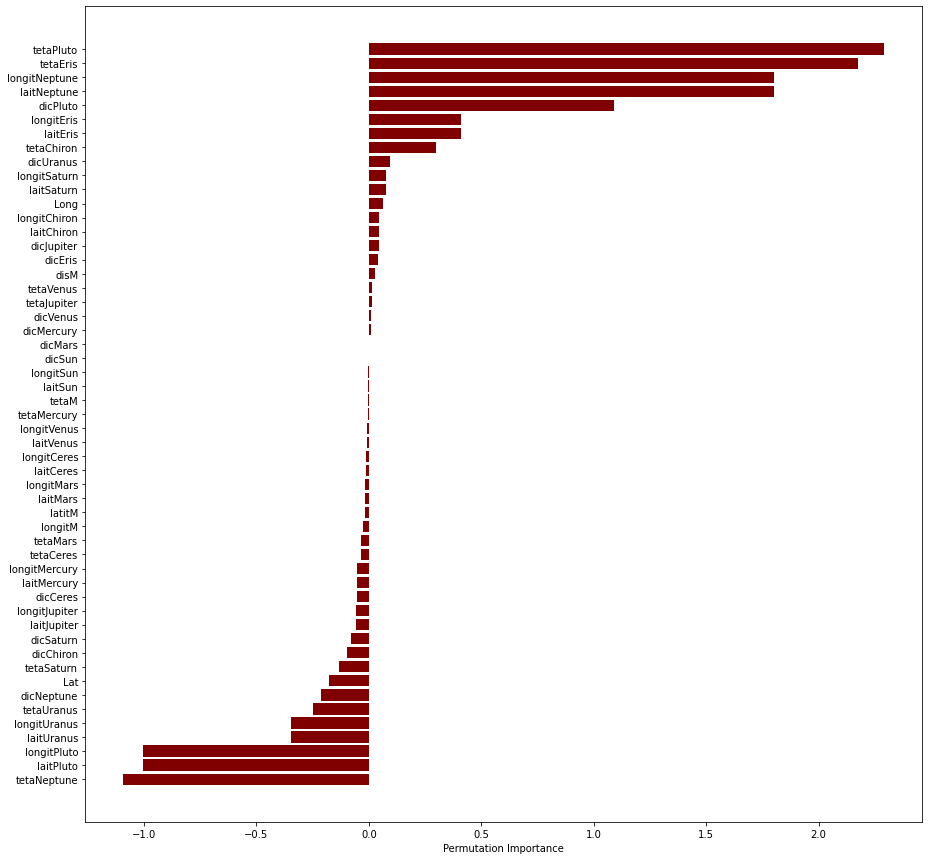

In [ ]:
arr = importance
for i in range(0, len(arr)):    
    for j in range(i+1, len(arr)):    
        if(arr[i] > arr[j]):    
            temp = arr[i];    
            arr[i] = arr[j];    
            arr[j] = temp;    
print (Z)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

plt.yticks(range(len(Z)), Z)
plt.barh(sorted(Z), arr, color="maroon")
plt.xlabel("Permutation Importance")

SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[9707  178]
 [ 530  397]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9885
           1       0.69      0.43      0.53       927

    accuracy                           0.93     10812
   macro avg       0.82      0.71      0.75     10812
weighted avg       0.93      0.93      0.93     10812



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC: 0.827


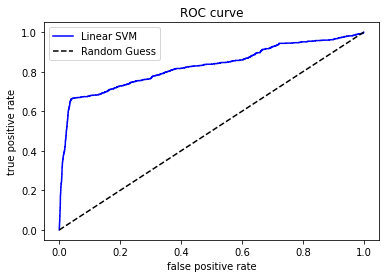

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)


decision_scores = model.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Prediction

svc linear kernel

In [ ]:
model.predict(X_test,y_test)

svc poly kernel

In [ ]:
svclassifier.predict(X_test,y_test)

linear regression 

In [ ]:
clf.predict(X_test,y_test)